In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

from PIL import Image
from pyboy import PyBoy
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import ffmpeg
import os

my_path = '/Volumes/Transcend/UIUC_CS_Online_Master/CS445/Final_Project/'
# Dimensions of the images inside the dataset.
input_dimensions = (128, 128, 3)
# Dimensions of the images inside the dataset.
output_dimensions = (256, 256, 3)
# The ratio of the difference in size of the two images. Used for setting ratio of image subplots
super_sampling_ratio = int(output_dimensions[0] / input_dimensions[0])
# Path to saved .h5 model
model_path = my_path+'/generator.h5'
# Boolean flag, set to True if the data has pngs to remove alpha layer from images
png = True

count = 0
def upscale(img: Image, model):
    # original image
    x = img.resize((input_dimensions[0], input_dimensions[1]))

    # interpolated (resized) image
    y = x.resize((output_dimensions[0], output_dimensions[1]))

    x = np.array(x)
    y = np.array(y)

    # Remove alpha layer if imgaes are PNG
    if(png):
        x = x[..., :3]
        y = y[..., :3]
        
    # save original image 
    cv2.imwrite(my_path + 'frames_original/frame_%d.png' % count,x)
    # save interpolated image
    cv2.imwrite(my_path + 'frames_interpolated/frame_%d.png' % count,y)


    x = x.reshape(1, input_dimensions[0],
                  input_dimensions[1], input_dimensions[2])/255
    result = np.array(model.predict_on_batch(x))*255
    result = result.reshape(
        output_dimensions[0], output_dimensions[1], output_dimensions[2])
    np.clip(result, 0, 255, out=result)
    result = result.astype('uint8')
    cv2.imwrite(my_path + 'frames/frame_%d.png' % count,result)


model = load_model(model_path)
pyboy = PyBoy(my_path+'red.gb')
while not pyboy.tick():
    pil_image = pyboy.screen_image()
    upscale(pil_image,model)
    count += 1
    pass
pyboy.tick()
#pil_image = pyboy.screen_image()
#upscale(pil_image,model)

RTC not present. Game tried to issue RTC command: 0x6000, 0x01
RTC not present. Game tried to issue RTC command: 0x6000, 0x00


KeyboardInterrupt: 

In [3]:
from PIL import Image
i = 0
while i<=12976:
    im1 = Image.open(my_path + 'frames/'+'frame_{0}.png'.format(i))
    im1.save(my_path + 'frames_jpg/'+'frame_{0}.jpg'.format(i))
    i+=1

In [41]:
def imageFolder2mpeg(input_path, output_path='./output_video.mpeg', fps=40.0):
    '''
    Extracts the frames from an input video file
    and saves them as separate frames in an output directory.
    Input:
        input_path: Input video file.
        output_path: Output directorys.
        fps: frames per second (default: 30).
    Output:
        None
    '''

    dir_frames = input_path
    files_info = os.scandir(dir_frames)

    file_names = [f.path for f in files_info if f.name.endswith(".jpg")]
    file_names.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    frame_Height, frame_Width = cv2.imread(file_names[0]).shape[:2]
    resolution = (frame_Width, frame_Height)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MPG1')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, resolution)

    frame_count = len(file_names)

    frame_idx = 0

    while frame_idx < frame_count:


        frame_i = cv2.imread(file_names[frame_idx])
        video_writer.write(frame_i)
        frame_idx += 1

    video_writer.release()

In [42]:
imageFolder2mpeg(my_path + 'frames_jpg/' ,)

In [75]:
def plot_figure(frame_number):
    x = cv2.cvtColor(cv2.imread(my_path + 'frames_original/frame_'+str(frame_number)+'.png'),cv2.COLOR_BGR2GRAY)
    y = cv2.cvtColor(cv2.imread(my_path + 'frames_interpolated/frame_'+str(frame_number)+'.png'),cv2.COLOR_BGR2GRAY)
    result = cv2.cvtColor(cv2.imread(my_path + 'frames/frame_'+str(frame_number)+'.png'),cv2.COLOR_BGR2GRAY)
    f, axarr =plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,super_sampling_ratio,super_sampling_ratio]})
    axarr[0].set_xlabel('Original Image (' + str(input_dimensions[0]) + 'x' + str(input_dimensions[1]) + ')', fontsize=10)
    axarr[1].set_xlabel('Interpolated Image (' + str(output_dimensions[0]) + 'x' + str(output_dimensions[1]) + ')', fontsize=10)
    axarr[2].set_xlabel('Super Sampled Image (' + str(output_dimensions[0]) + 'x' + str(output_dimensions[1]) + ')', fontsize=10)

    axarr[0].imshow(x,cmap='gray')
    axarr[1].imshow(y,cmap='gray')
    axarr[2].imshow(result,cmap='gray')
    print('Increase in bytes: ',os.stat(my_path + 'frames/frame_'+str(frame_number)+'.png').st_size\
          -os.stat(my_path + 'frames_interpolated/frame_'+str(frame_number)+'.png').st_size)

Increase in bytes:  17691
Increase in bytes:  15295
Increase in bytes:  15946
Increase in bytes:  15860
Increase in bytes:  28855
Increase in bytes:  28188


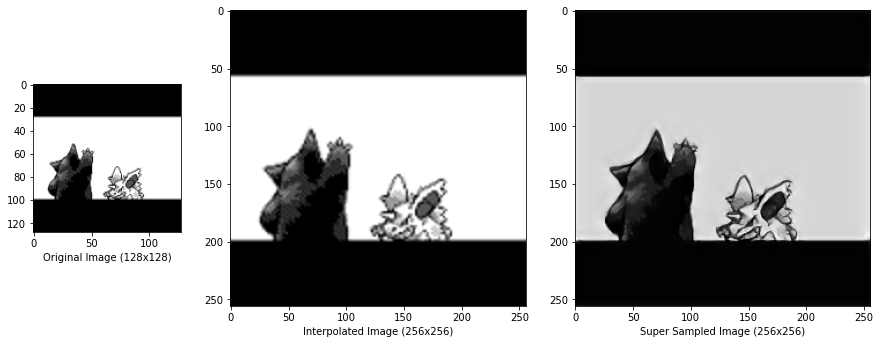

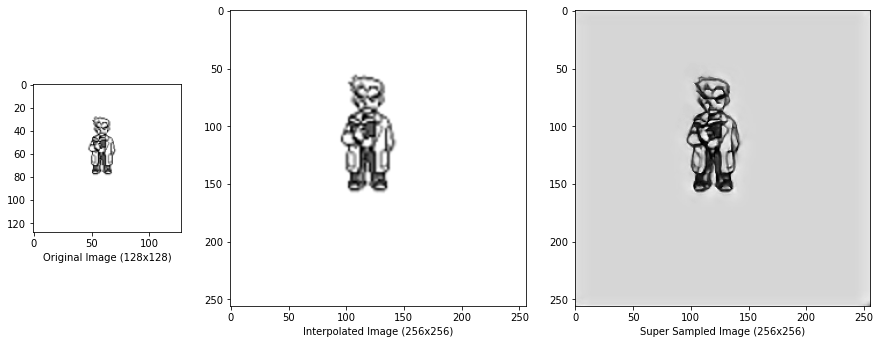

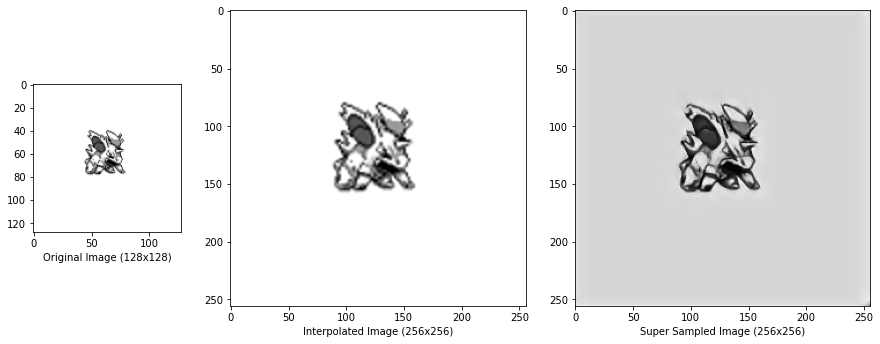

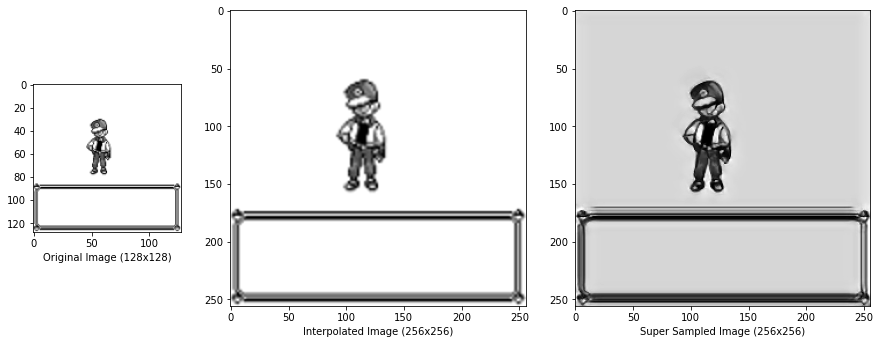

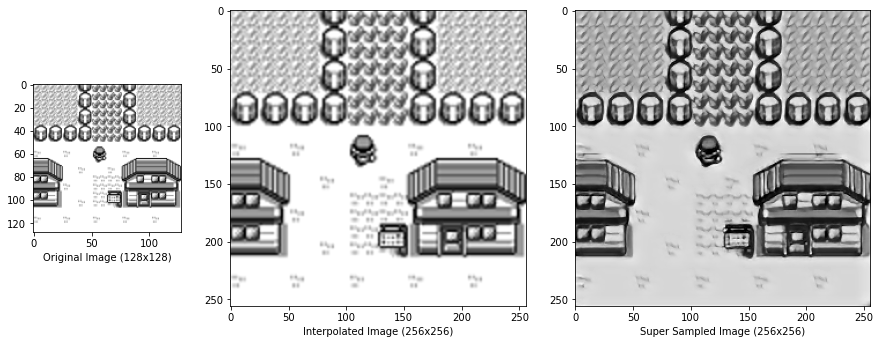

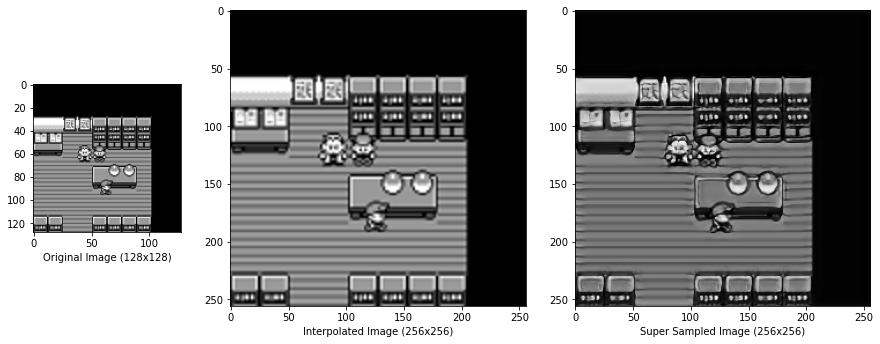

In [76]:
plot_figure(900)
plot_figure(1650)
plot_figure(2008)
plot_figure(4351)
plot_figure(5482)
plot_figure(10422)